In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

#loading data
df=pd.read_csv('/Users/joe/Desktop/data analysis/data/companies.csv')

#general cleaning
df['date']=pd.to_datetime(df['date'])
df['techStack']=df['techStack'].str.split(',')
df['techStack'] = df['techStack'].apply(lambda x: [tech.strip() for tech in x])  
                    

In [18]:
df_explode=df.explode('techStack').copy()
symptoms_stats = (
    df_explode.groupby('techStack')
    .agg(
        tech_tools_count=('techStack', 'size'),
        revenue=('revenue', 'median')
    )
    .sort_values(by='tech_tools_count', ascending=False)
    .head(10)
)
symptoms_stats

,tech_tools_count,revenue
techStack,,
AWS,52,428755.56
ReactJS,35,600000.00
PHP,28,550000.00
Python,26,492830.00
NodeJS,19,350000.00
Rubyrails,17,600000.00
Angular,15,383395.00
.Net,11,600000.00
MYSQL,11,565000.00


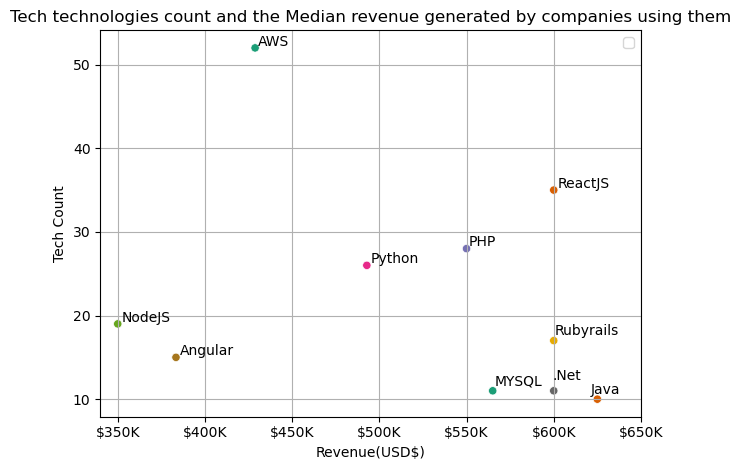

In [19]:

sns.scatterplot(data=symptoms_stats,x='revenue',y='tech_tools_count',hue="techStack",palette='Dark2')

#adding text labels to the scatter plot
texts=[]

for i ,title in enumerate(symptoms_stats.index):
   texts.append(plt.text(symptoms_stats['revenue'].iloc[i],symptoms_stats['tech_tools_count'].iloc[i],title))

adjust_text(texts)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.title('Tech technologies count and the Median revenue generated by companies using them')
plt.ylabel('Tech Count')
plt.xlabel('Revenue(USD$)')
plt.grid(visible=True)
plt.xlim(340000,650000)
plt.legend('')
plt.tight_layout()
plt.show()


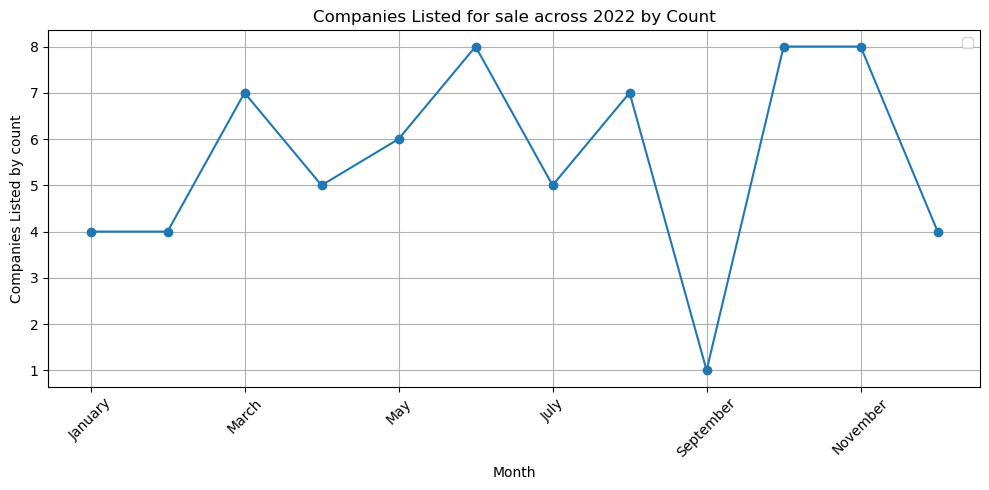

In [20]:

df_2022 = df[df['date'].dt.year == 2022].copy()
df_2022
df_2022['month_date'] = df_2022['date'].dt.strftime('%B')
month_count = df_2022['month_date'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()
month_count.columns = ['month_date', 'count']
month_count.set_index('month_date',inplace=True)

month_count.plot(kind='line', marker='o', figsize=(10, 5))

# Adding titles and labels
plt.title('Companies Listed for sale across 2022 by Count')
plt.xlabel('Month')
plt.ylabel('Companies Listed by count')
plt.legend('')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()








